# Apple Banana Tomato Classification Mobilenet_v2

## Get images

In [ ]:
!git clone https://github.com/lacakp/fruit-ds.git

Cloning into 'fruit-ds'...
remote: Enumerating objects: 17106, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 17106 (delta 0), reused 0 (delta 0), pack-reused 17100
Receiving objects: 100% (17106/17106), 376.21 MiB | 31.88 MiB/s, done.
Resolving deltas: 100% (35/35), done.


## Check images

In [ ]:
print("All train image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/train/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/train/apple/* | wc -l 

print("\n------------------")

print("Banana Image Count")
!ls /content/fruit-ds/train/banana/* | wc -l 

print("\n------------------")

print("Tomato Image Count")
!ls /content/fruit-ds/train/tomato/* | wc -l 

All train image in 3 class apple, banana, tomato
3000

------------------
Apple image count
1000

------------------
Banana Image Count
1000

------------------
Tomato Image Count
1000


## import MobileNetV2

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
model = MobileNetV2(weights='imagenet')

14548992/14536120 [==============================] - 0s 0us/step


## Preparing train and validation data

### Import libraly

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

### Setting path and shape image

In [ ]:
train_data_path = '/content/fruit-ds/train'
test_data_path = '/content/fruit-ds/test'
height = 224
width = 224
batch_size = 32

### Training data

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 3000 files belonging to 3 classes.
Using 2100 files for training.


### Validation data

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 3000 files belonging to 3 classes.
Using 900 files for validation.


### Get Class

In [ ]:
classes = train_ds.class_names
print(classes)
print(train_ds)

['apple', 'banana', 'tomato']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


## Modifying the model

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### import libraly

In [ ]:
from keras import Model
from keras.layers import Dense

### Custom model

In [ ]:
abt_output = Dense(3, activation='softmax')
abt_output = abt_output(model.layers[-2].output)

abt_input = model.input
abt_model = Model(inputs=abt_input, outputs=abt_output)

for layer in abt_model.layers[:-1]:
  layer.trainable = False

### Compile model

In [ ]:
abt_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Training the model

In [ ]:
ABTFruit = abt_model.fit(train_ds,
                     validation_data = val_ds, 
                     epochs=10
                     )

Epoch 1/10
66/66 [==============================] - 42s 156ms/step - loss: 0.3115 - accuracy: 0.9029 - val_loss: 0.0890 - val_accuracy: 0.9967
Epoch 2/10
66/66 [==============================] - 9s 131ms/step - loss: 0.0635 - accuracy: 0.9967 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 3/10
66/66 [==============================] - 9s 132ms/step - loss: 0.0359 - accuracy: 0.9986 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 4/10
66/66 [==============================] - 9s 131ms/step - loss: 0.0242 - accuracy: 0.9995 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 5/10
66/66 [==============================] - 9s 132ms/step - loss: 0.0181 - accuracy: 0.9995 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 6/10
66/66 [==============================] - 9s 131ms/step - loss: 0.0141 - accuracy: 0.9995 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 7/10
66/66 [==============================] - 9s 132ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch

## Graph

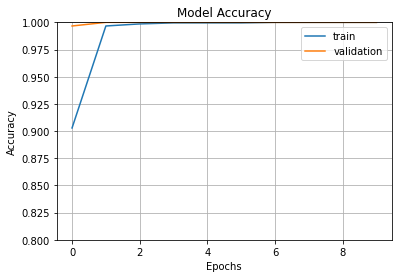

In [ ]:
# Model Accuracy
plt.plot(ABTFruit.history['accuracy'])
plt.plot(ABTFruit.history['val_accuracy'])
plt.axis(ymin=0.8, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

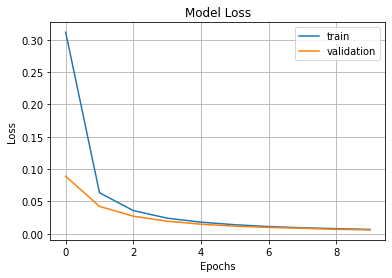

In [ ]:
# Model Loss
plt.plot(ABTFruit.history['loss'])
plt.plot(ABTFruit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Predictions

### Import library

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize

### Prediction values

In [ ]:
image = cv2.imread('/content/fruit-ds/test/apple/apple_test (1).jpg')

resized = cv2.resize(image, (224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(resized)
img_array = tf.expand_dims(img_array, 0)
pred = abt_model.predict(img_array)
print(pred)

[[9.9814928e-01 6.5532397e-04 1.1954698e-03]]


In [ ]:
score = pred[0]
print(score)
print("แอปเปิล {:.2f} %".format(score[0]*100))
print("กล้วย {:.2f} %".format(score[1]*100))
print("มะเขือเทศ {:.2f} %".format(score[2]*100))

[9.9814928e-01 6.5532397e-04 1.1954698e-03]
แอปเปิล 99.81 %
กล้วย 0.07 %
มะเขือเทศ 0.12 %


### prediction from test image

### Setting path of test images

In [ ]:
test_data_path = '/content/fruit-ds/test'

### Prediction function

In [ ]:
def abt_predict(image):
  """
  ฟังก์ชันสำหรับการทำนายภาพผลไม้ แอปเปื้ล กล้วย และมะเขือเทศ
  Prediction Function 
  args: image (<class 'numpy.ndarray'>)
  """
  resized = cv2.resize(image, (224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(resized)
  img_array = tf.expand_dims(img_array, 0)
  pred = abt_model.predict(img_array)
  score = pred[0]

  result = np.argmax(score)
  if result == 0:
    print('prediction: this is apple')
  if result == 1:
    print('prediction: this is banana')
  if result == 2:
    print("prediction: this is tomato")

  print("prediction score: Apple {:.2f} %".format(score[0]*100))
  print("prediction score: Banana {:.2f} %".format(score[1]*100))
  print("prediction score: Tomato {:.2f} %".format(score[2]*100))
  print("----------")

### view count of image and import library for random

In [ ]:
from random import randint

print("All test image in 3 class apple, banana, tomato")
!ls /content/fruit-ds/test/*/* | wc -l 

print("\n------------------")

print("Apple image count")
!ls /content/fruit-ds/test/apple/* | wc -l 

print("\n------------------")

print("Banana Image Count")
!ls /content/fruit-ds/test/banana/* | wc -l 

print("\n------------------")

print("Tomato Image Count")
!ls /content/fruit-ds/test/tomato/* | wc -l 

All test image in 3 class apple, banana, tomato
1309

------------------
Apple image count
406

------------------
Banana Image Count
484

------------------
Tomato Image Count
419


### prediction use predict function by random image from test folder

#### Apple

apple figure(1)


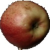

prediction: this is apple
prediction score: Apple 99.21 %
prediction score: Banana 0.53 %
prediction score: Tomato 0.26 %
----------
apple figure(2)


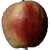

prediction: this is apple
prediction score: Apple 99.56 %
prediction score: Banana 0.16 %
prediction score: Tomato 0.27 %
----------
apple figure(3)


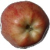

prediction: this is apple
prediction score: Apple 99.82 %
prediction score: Banana 0.08 %
prediction score: Tomato 0.09 %
----------
apple figure(4)


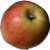

prediction: this is tomato
prediction score: Apple 33.99 %
prediction score: Banana 0.98 %
prediction score: Tomato 65.03 %
----------
apple figure(5)


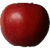

prediction: this is apple
prediction score: Apple 82.91 %
prediction score: Banana 4.06 %
prediction score: Tomato 13.03 %
----------
apple figure(6)


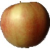

prediction: this is apple
prediction score: Apple 98.74 %
prediction score: Banana 0.35 %
prediction score: Tomato 0.91 %
----------
apple figure(7)


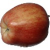

prediction: this is apple
prediction score: Apple 95.97 %
prediction score: Banana 1.06 %
prediction score: Tomato 2.96 %
----------
apple figure(8)


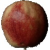

prediction: this is apple
prediction score: Apple 99.80 %
prediction score: Banana 0.09 %
prediction score: Tomato 0.12 %
----------
apple figure(9)


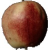

prediction: this is apple
prediction score: Apple 99.61 %
prediction score: Banana 0.16 %
prediction score: Tomato 0.23 %
----------
apple figure(10)


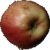

prediction: this is apple
prediction score: Apple 99.00 %
prediction score: Banana 0.77 %
prediction score: Tomato 0.23 %
----------


In [ ]:
# Apple
for i in range(10):
  im = cv2.imread(f'{test_data_path}/apple/apple_test ({randint(1,400)}).jpg')
  print(f"apple figure({i+1})")
  cv2_imshow(cv2.resize(im, (50, 50)))
  abt_predict(im)

#### Banana

banana figure(1)


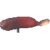

prediction: this is banana
prediction score: Apple 0.56 %
prediction score: Banana 99.35 %
prediction score: Tomato 0.09 %
----------
banana figure(2)


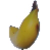

prediction: this is banana
prediction score: Apple 0.10 %
prediction score: Banana 99.81 %
prediction score: Tomato 0.09 %
----------
banana figure(3)


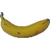

prediction: this is banana
prediction score: Apple 0.01 %
prediction score: Banana 99.99 %
prediction score: Tomato 0.00 %
----------
banana figure(4)


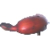

prediction: this is banana
prediction score: Apple 0.22 %
prediction score: Banana 99.78 %
prediction score: Tomato 0.00 %
----------
banana figure(5)


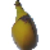

prediction: this is banana
prediction score: Apple 0.07 %
prediction score: Banana 99.84 %
prediction score: Tomato 0.08 %
----------
banana figure(6)


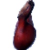

prediction: this is banana
prediction score: Apple 0.01 %
prediction score: Banana 99.82 %
prediction score: Tomato 0.17 %
----------
banana figure(7)


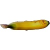

prediction: this is banana
prediction score: Apple 0.13 %
prediction score: Banana 99.86 %
prediction score: Tomato 0.01 %
----------
banana figure(8)


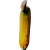

prediction: this is banana
prediction score: Apple 0.05 %
prediction score: Banana 99.57 %
prediction score: Tomato 0.38 %
----------
banana figure(9)


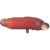

prediction: this is banana
prediction score: Apple 1.85 %
prediction score: Banana 98.15 %
prediction score: Tomato 0.01 %
----------
banana figure(10)


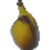

prediction: this is banana
prediction score: Apple 0.15 %
prediction score: Banana 99.65 %
prediction score: Tomato 0.20 %
----------


In [ ]:
# Banana
for i in range(10):
  im = cv2.imread(f'{test_data_path}/banana/banana_test ({randint(1,400)}).jpg')
  print(f"banana figure({i+1})")
  cv2_imshow(cv2.resize(im, (50, 50)))
  abt_predict(im)

#### Tomato

tomato figure(1)


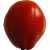

prediction: this is tomato
prediction score: Apple 7.25 %
prediction score: Banana 3.59 %
prediction score: Tomato 89.16 %
----------
tomato figure(2)


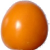

prediction: this is apple
prediction score: Apple 71.23 %
prediction score: Banana 8.77 %
prediction score: Tomato 20.00 %
----------
tomato figure(3)


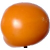

prediction: this is apple
prediction score: Apple 52.73 %
prediction score: Banana 17.28 %
prediction score: Tomato 30.00 %
----------
tomato figure(4)


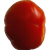

prediction: this is tomato
prediction score: Apple 6.04 %
prediction score: Banana 9.03 %
prediction score: Tomato 84.93 %
----------
tomato figure(5)


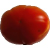

prediction: this is tomato
prediction score: Apple 3.72 %
prediction score: Banana 10.99 %
prediction score: Tomato 85.30 %
----------
tomato figure(6)


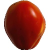

prediction: this is tomato
prediction score: Apple 0.99 %
prediction score: Banana 0.70 %
prediction score: Tomato 98.31 %
----------
tomato figure(7)


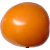

prediction: this is tomato
prediction score: Apple 32.73 %
prediction score: Banana 7.04 %
prediction score: Tomato 60.24 %
----------
tomato figure(8)


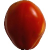

prediction: this is tomato
prediction score: Apple 1.08 %
prediction score: Banana 1.49 %
prediction score: Tomato 97.43 %
----------
tomato figure(9)


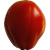

prediction: this is tomato
prediction score: Apple 7.45 %
prediction score: Banana 4.41 %
prediction score: Tomato 88.14 %
----------
tomato figure(10)


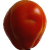

prediction: this is tomato
prediction score: Apple 16.94 %
prediction score: Banana 9.82 %
prediction score: Tomato 73.24 %
----------


In [ ]:
# Tomato
for i in range(10):
  im = cv2.imread(f'{test_data_path}/tomato/tomato ({randint(1,400)}).jpg')
  print(f"tomato figure({i+1})")
  cv2_imshow(cv2.resize(im, (50, 50)))
  abt_predict(im)

## Save Model

In [ ]:
model.save('apple_banana_tomato_model', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
